<center><img src="redpopcorn.jpg"></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

netflix_df = pd.read_csv("netflix_data.csv")

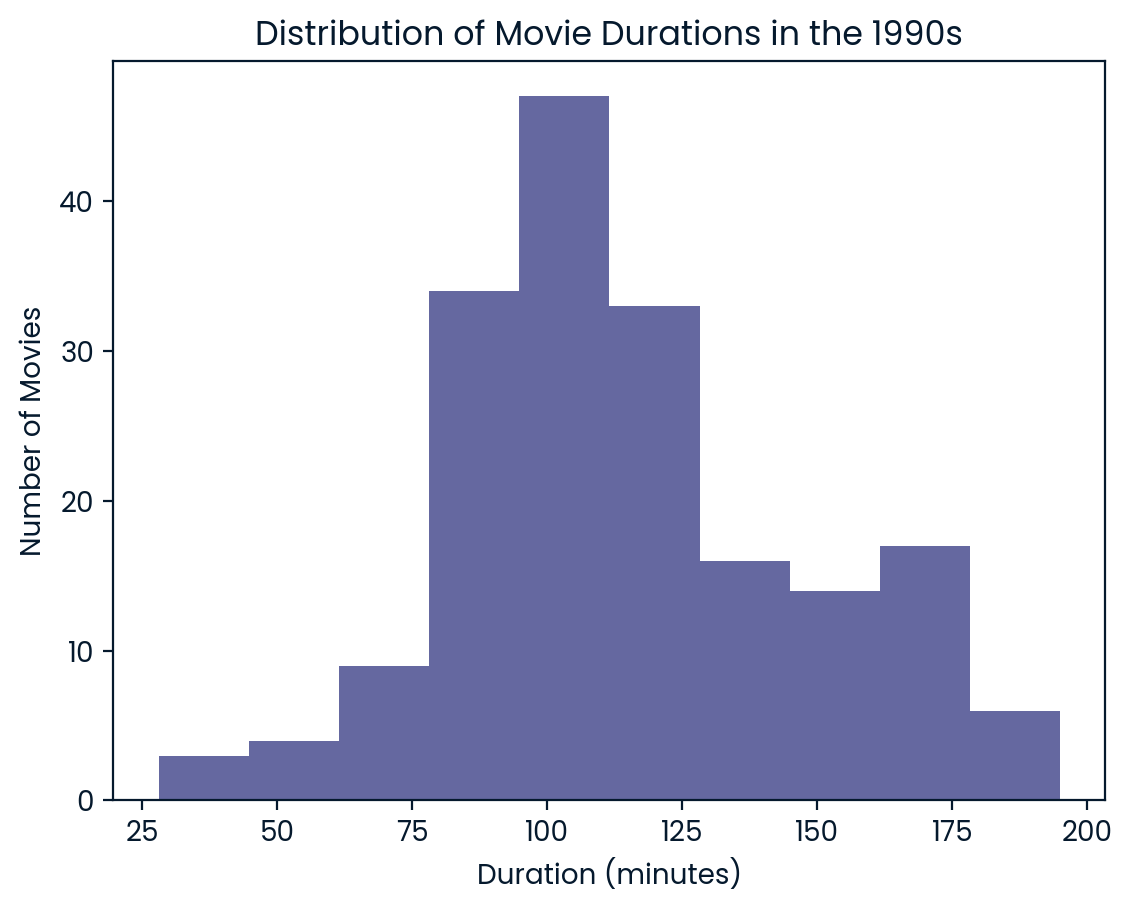

7


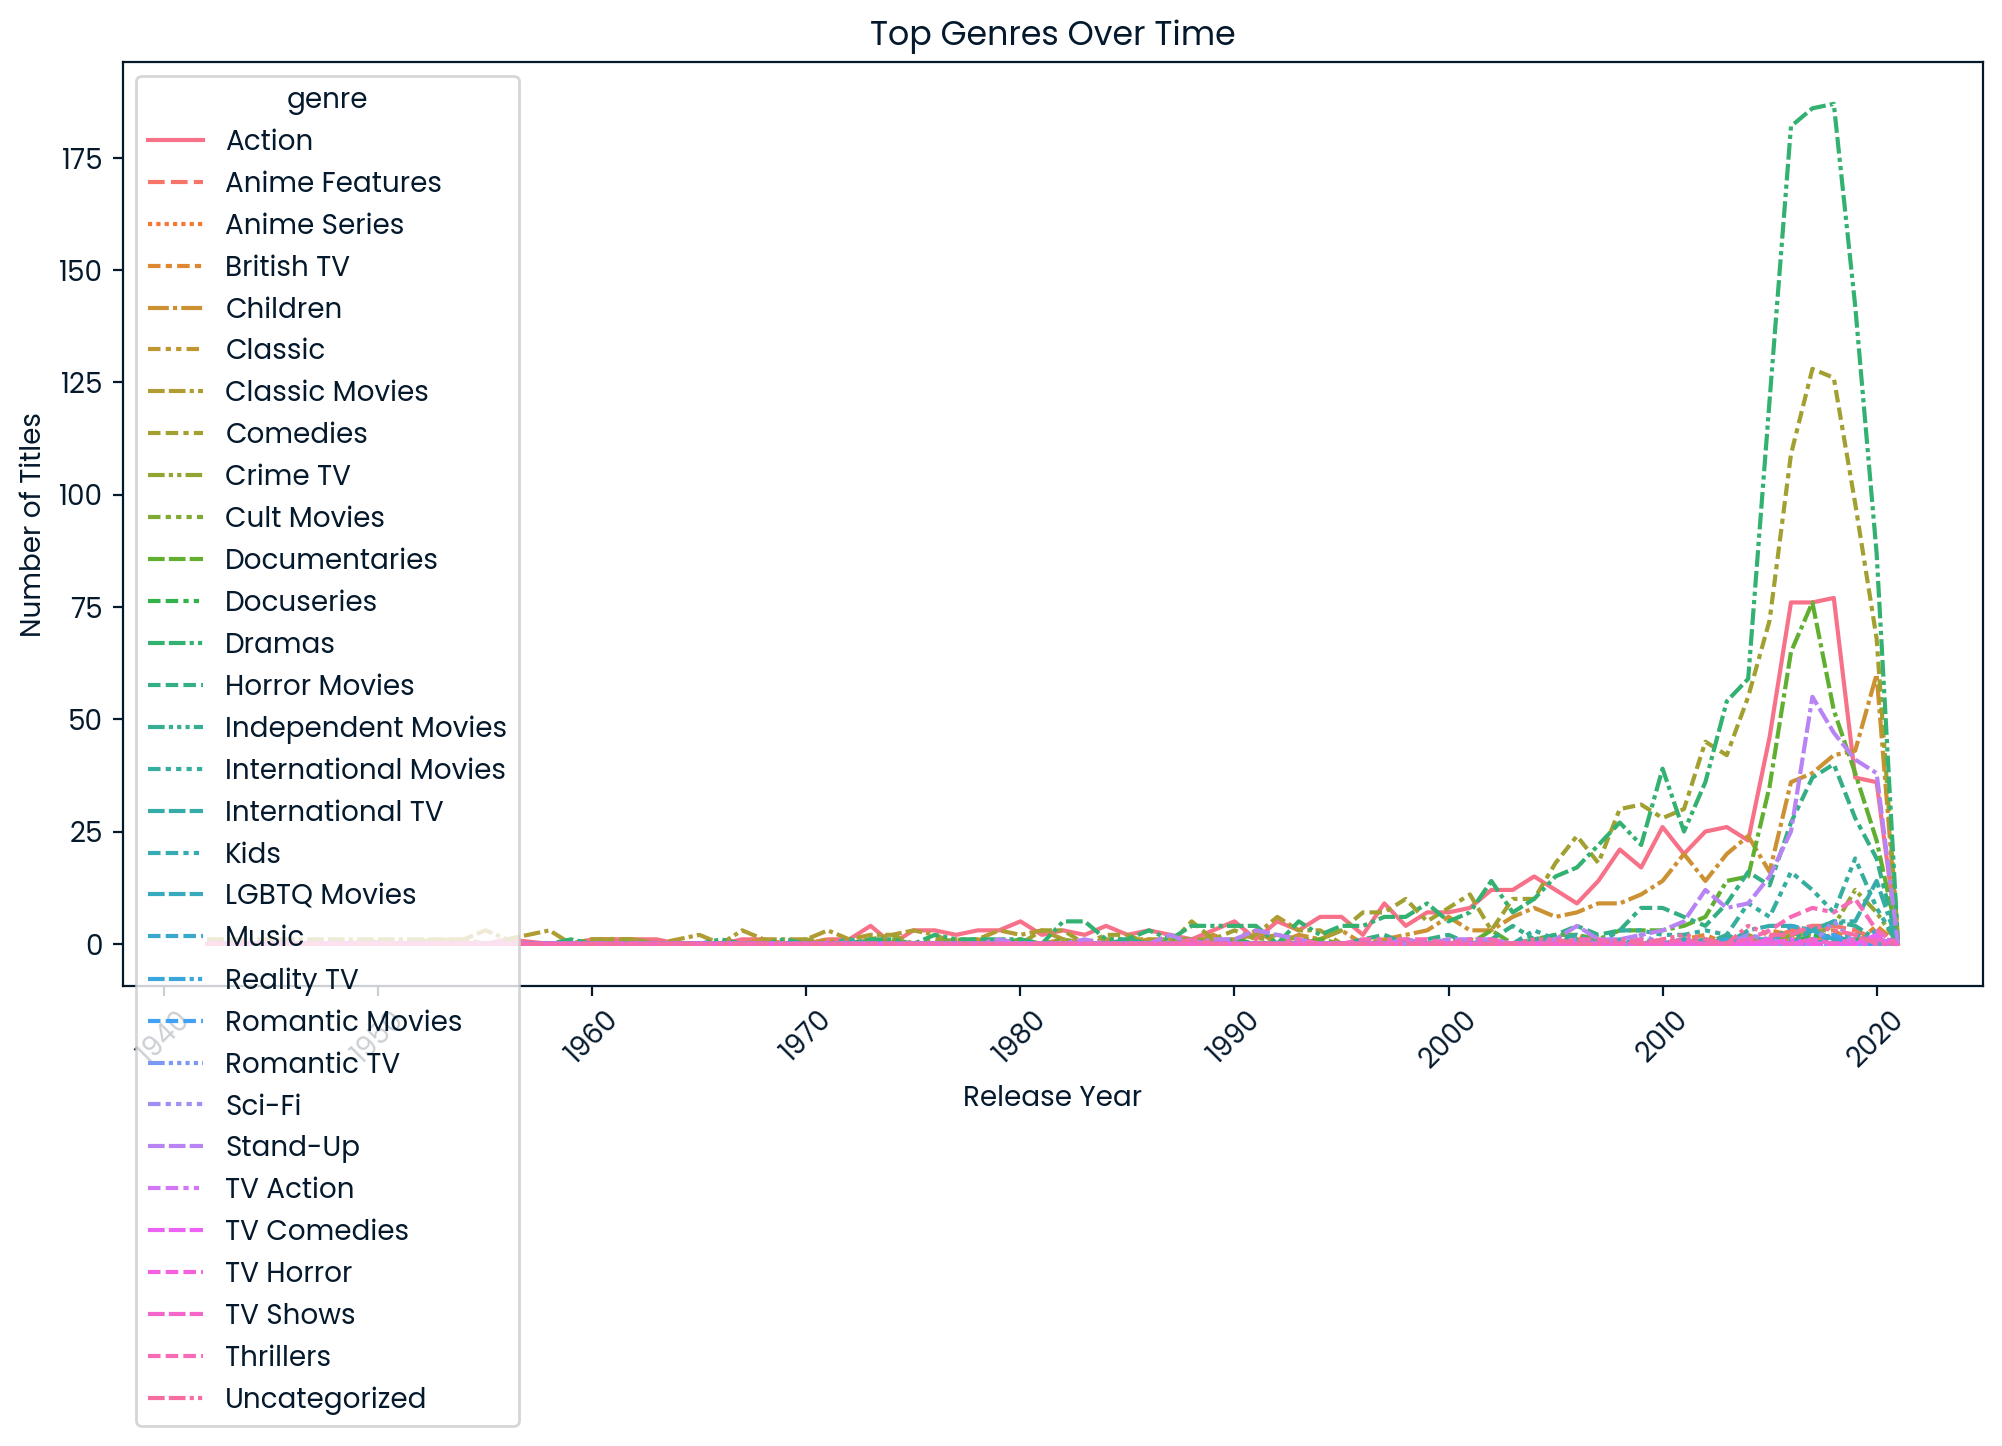

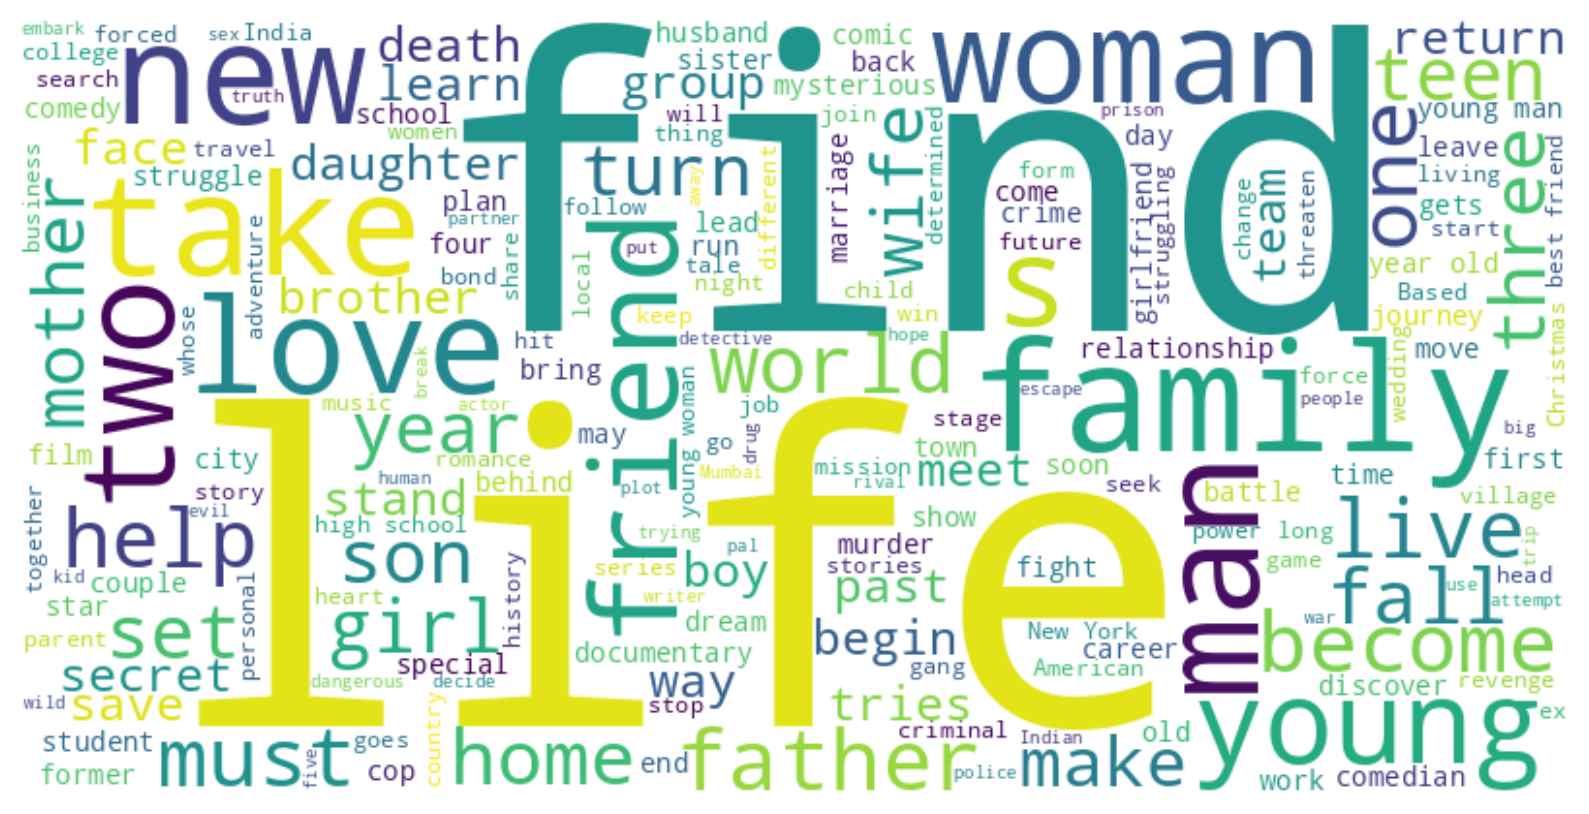

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: director, dtype: int64


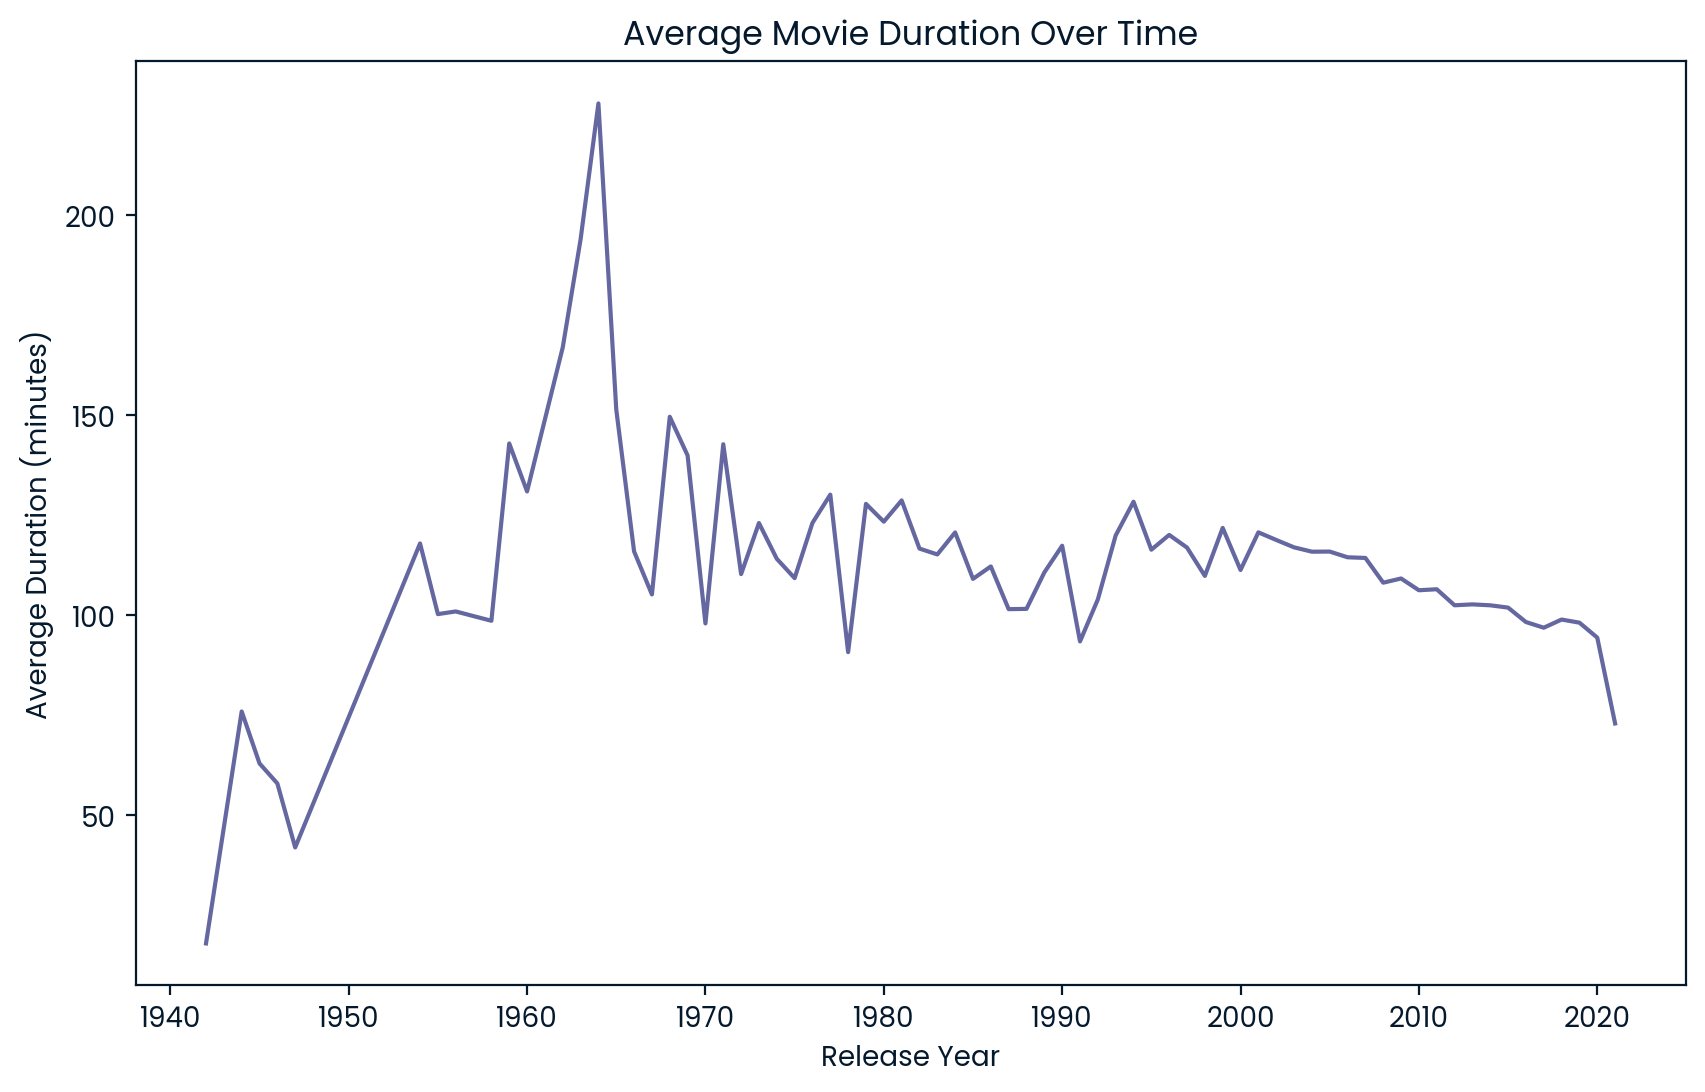

[(('Robb Wells', 'John Dunsworth'), 9), (('John Paul Tremblay', 'John Dunsworth'), 9), (('Laura Bailey', 'Erin Fitzgerald'), 8), (('Junko Takeuchi', 'Chie Nakamura'), 8), (('John Paul Tremblay', 'Robb Wells'), 8), (('Takahiro Sakurai', 'Yuki Kaji'), 7), (('Kate Higgins', 'Salli Saffioti'), 7), (('Eric Idle', 'Terry Jones'), 7), (('Eric Idle', 'Michael Palin'), 7), (('Terry Jones', 'Michael Palin'), 7)]


In [11]:
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

subset = netflix_subset[(netflix_subset["release_year"] >= 1990)]

movies_1990s = subset[(subset["release_year"] < 2000)]

plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

short_movie_count = 0

for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

# Looking for top genres on netflix over time, really interestng stuff!
genre_counts = netflix_df.groupby(['release_year', 'genre']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_counts)
plt.title('Top Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


from wordcloud import WordCloud

# What words pop up the most in netflix titles?

# Combine all movie descriptions
text = " ".join(netflix_df[netflix_df['type'] == 'Movie']['description'].astype(str))

# Generates the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Country contributions to Netflix's content library

import plotly.express as px

# Count the titles per country ofc
country_counts = netflix_df['country'].value_counts()

# This is what we use to create the map
fig = px.choropleth(country_counts, locations=country_counts.index,
                    color=country_counts.values,
                    locationmode='country names',
                    color_continuous_scale="Viridis",
                    title='Netflix Content by Country')
fig.show()

# Which directors have the most netflix titles?

top_directors = netflix_df['director'].value_counts().head(10)
print(top_directors)

# Have movies gotten longer or shorter on average over the years?
# I guess people in the 60s had a lot of free time...

avg_duration_by_year = netflix_df[netflix_df['type'] == 'Movie'].groupby('release_year')['duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_duration_by_year)
plt.title('Average Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

# What are the most common casting duos?

from collections import Counter
from itertools import combinations

cast_pairs = []
for cast_list in netflix_df['cast'].dropna():
    cast = cast_list.split(', ')
    if len(cast) > 1:
        cast_pairs.extend(combinations(cast, 2))

top_pairs = Counter(cast_pairs).most_common(10)
print(top_pairs)
